https://projecteuler.net/problem=18
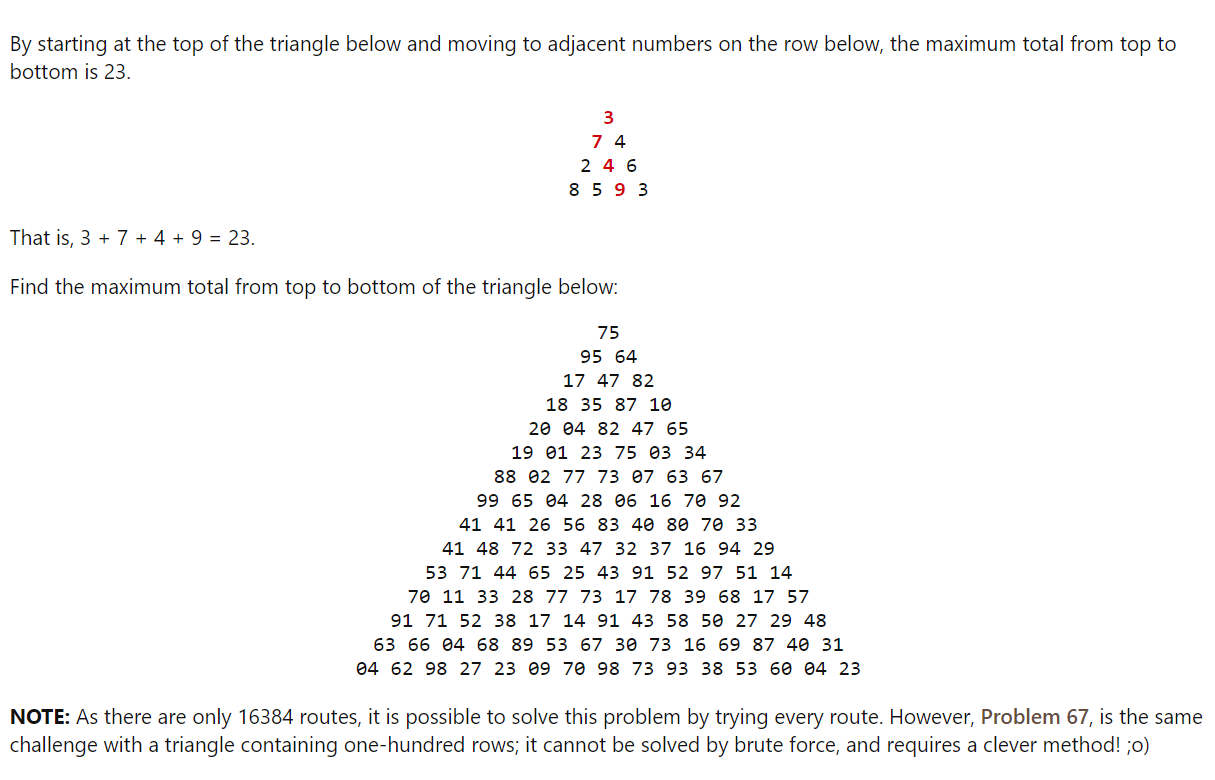

In [3]:
import numpy as np
np.set_printoptions(linewidth=400)

In [4]:
pyramid = """
75
95 64
17 47 82
18 35 87 10
20 04 82 47 65
19 01 23 75 03 34
88 02 77 73 07 63 67
99 65 04 28 06 16 70 92
41 41 26 56 83 40 80 70 33
41 48 72 33 47 32 37 16 94 29
53 71 44 65 25 43 91 52 97 51 14
70 11 33 28 77 73 17 78 39 68 17 57
91 71 52 38 17 14 91 43 58 50 27 29 48
63 66 04 68 89 53 67 30 73 16 69 87 40 31
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23
"""
pyramid = pyramid.strip().split("\n")
pyramid = [row.split(" ") for row in pyramid]
pyramid = [list(map(int,i)) for i in pyramid]

In [5]:
%%time
def calc_max_path(i, j, current_sum):
    if i+1 > len(pyramid)-1:
        return current_sum + pyramid[i][j]
    else:
        left_path = 0
        right_path = 0
        if j+1 < len(pyramid[i+1]):
            right_path = calc_max_path(i+1, j+1, current_sum + pyramid[i][j])
        if j > 0:
            left_path = calc_max_path(i+1, j, current_sum + pyramid[i][j])
            
        return max(left_path, right_path)
print(calc_max_path(0, 0, 0))

1074
CPU times: user 1.78 ms, sys: 2.97 ms, total: 4.75 ms
Wall time: 5.08 ms


The algorithm below keeps track of previously calcuated values in order to avoid recalculating previously visited paths.

In [16]:
%%time
max_path_values = np.zeros((len(pyramid), len(pyramid[-1])))
def calc_max_path():
    # Note we reverse the list so that the traversal starts at the bottom of the pyramid so we can take advantage of storing previous paths
    for i, row in reversed(list(enumerate(pyramid))):
       for j, _ in enumerate(row):
           max_path_values[i][j] = _calc_max_path(i, j, 0)
    return int(max_path_values[0][0])
    
def _calc_max_path(i, j, current_sum):
    if max_path_values[i][j] != 0:
        return current_sum + max_path_values[i][j]
    elif i+1 > len(pyramid)-1:
        return current_sum + pyramid[i][j]
    else:
        left_path = 0
        right_path = 0
        if j+1 < len(pyramid[i+1]):
            right_path = _calc_max_path(i+1, j+1, current_sum + pyramid[i][j])
        if j >= 0:
            left_path = _calc_max_path(i+1, j, current_sum + pyramid[i][j])
            
        return max(left_path, right_path)
print(calc_max_path())

1074
CPU times: user 119 µs, sys: 121 µs, total: 240 µs
Wall time: 256 µs


array([[1074.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 995.,  999.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 818.,  900.,  935.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 704.,  801.,  853.,  792.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 686.,  640.,  766.,  731.,  782.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 666.,  614.,  636.,  684.,  660.,  717.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 647.,  501.,  613.,  609.,  533.,  657.,  683.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 559.,  499.,  479.,  536.,  514.,  526.,  594.,  616.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 460.,  434.,  419.,  475.,  508.,  470.,  510.,  524.,  487.,    0.,    0.,    